In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.9.12 (main, Mar 25 2022, 00:00:00) 
[GCC 11.2.1 20220127 (Red Hat 11.2.1-9)]
pandas version: 1.3.5
matplotlib version: 3.5.1
NumPy version: 1.20.1
SciPy version: 1.8.0
IPython version: 8.0.1
scikit-learn version: 1.0.2
-------------------------


In [122]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
pd.options.display.max_rows = 100

In [123]:
train_csv_path = "../input/train.csv"
test_csv_path = "../input/test.csv"

data_raw = pd.read_csv(train_csv_path)
data_test = pd.read_csv(test_csv_path)

data1 = data_raw.copy()
data_cleaner = [data1, data_test]

print("Shape :", data_raw.shape)
print(data_raw.info())
data_raw.sample(10)

Shape : (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,NaN,C
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
135,136,0,2,"Richard, Mr. Emile",male,23.0,0,0,SC/PARIS 2133,15.0458,NaN,C
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
646,647,0,3,"Cor, Mr. Liudevit",male,19.0,0,0,349231,7.8958,NaN,S
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C


In [124]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*20)

print('Test/Validation columns with null values:\n', data_test.isnull().sum())
print("-"*20)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [125]:
drop_column = ['PassengerId', 'Ticket', 'Cabin']
for dataset in data_cleaner:
    dataset.drop(drop_column, axis = 1, inplace = True)
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [126]:
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch']
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 0] = 0
    dataset['Title'] = dataset['Name'].str.split(", ", expand = True)[1].str.split(".", expand = True)[0]
data1.sample(10)
data1['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [127]:
stat_min = 20
for dataset in data_cleaner:
    title_names = (dataset['Title'].value_counts() < stat_min)
    dataset['Title'] = dataset['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
    dataset.drop('Name', axis = 1, inplace = True)

print(data1['Title'].value_counts())
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
487,0,1,male,58.0,0,0,29.7000,C,0,1,Mr
540,1,1,female,36.0,0,2,71.0000,S,2,0,Miss
823,1,3,female,27.0,0,1,12.4750,S,1,0,Mrs
193,1,2,male,3.0,1,1,26.0000,S,2,0,Master
479,1,3,female,2.0,0,1,12.2875,S,1,0,Miss
497,0,3,male,28.0,0,0,15.1000,S,0,1,Mr
311,1,1,female,18.0,2,2,262.3750,C,4,0,Miss
208,1,3,female,16.0,0,0,7.7500,Q,0,1,Miss
17,1,2,male,28.0,0,0,13.0000,S,0,1,Mr
382,0,3,male,32.0,0,0,7.9250,S,0,1,Mr


In [128]:
data1 = pd.get_dummies(data1)
data_test = pd.get_dummies(data_test)
data1.sample(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
477,0,3,29.0,1,0,7.0458,1,0,0,1,0,0,1,0,0,0,1,0
340,1,2,2.0,1,1,26.0000,2,0,0,1,0,0,1,1,0,0,0,0
363,0,3,35.0,0,0,7.0500,0,1,0,1,0,0,1,0,0,0,1,0
31,1,1,28.0,1,0,146.5208,1,0,1,0,1,0,0,0,0,0,0,1
220,1,3,16.0,0,0,8.0500,0,1,0,1,0,0,1,0,0,0,1,0
890,0,3,32.0,0,0,7.7500,0,1,0,1,0,1,0,0,0,0,1,0
622,1,3,20.0,1,1,15.7417,2,0,0,1,1,0,0,0,0,0,1,0
651,1,2,18.0,0,1,23.0000,1,0,1,0,0,0,1,0,0,1,0,0
484,1,1,25.0,1,0,91.0792,1,0,0,1,1,0,0,0,0,0,1,0
134,0,2,25.0,0,0,13.0000,0,1,0,1,0,0,1,0,0,0,1,0


In [129]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Age           891 non-null    float64
 3   SibSp         891 non-null    int64  
 4   Parch         891 non-null    int64  
 5   Fare          891 non-null    float64
 6   FamilySize    891 non-null    int64  
 7   IsAlone       891 non-null    int64  
 8   Sex_female    891 non-null    uint8  
 9   Sex_male      891 non-null    uint8  
 10  Embarked_C    891 non-null    uint8  
 11  Embarked_Q    891 non-null    uint8  
 12  Embarked_S    891 non-null    uint8  
 13  Title_Master  891 non-null    uint8  
 14  Title_Misc    891 non-null    uint8  
 15  Title_Miss    891 non-null    uint8  
 16  Title_Mr      891 non-null    uint8  
 17  Title_Mrs     891 non-null    uint8  
dtypes: float64(2), int64(6), uint8

In [130]:
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pclass        418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   FamilySize    418 non-null    int64  
 6   IsAlone       418 non-null    int64  
 7   Sex_female    418 non-null    uint8  
 8   Sex_male      418 non-null    uint8  
 9   Embarked_C    418 non-null    uint8  
 10  Embarked_Q    418 non-null    uint8  
 11  Embarked_S    418 non-null    uint8  
 12  Title_Master  418 non-null    uint8  
 13  Title_Misc    418 non-null    uint8  
 14  Title_Miss    418 non-null    uint8  
 15  Title_Mr      418 non-null    uint8  
 16  Title_Mrs     418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(10)
memory usage: 27.1 KB
None


In [131]:
target = ['Survived']
data1_X_calc = [col for col in data1.columns if col not in target]
print(data1_X_calc)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs']


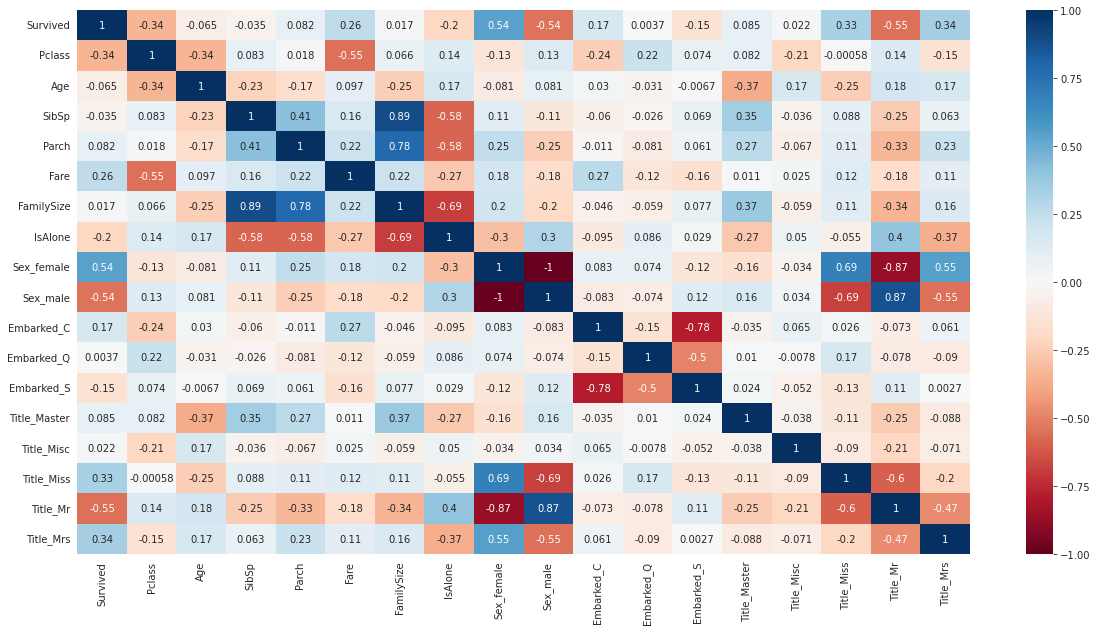

In [133]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(data1.corr(), annot=True, cmap='RdBu')

In [138]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),

    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),


    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()
    ]



#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_X_calc], data1[target], cv  = cv_split, return_train_score = True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!


    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_X_calc], data1[target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_X_calc])

    row_index+=1


#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.918352,0.83694,0.055981,0.072608
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.832584,0.827239,0.05709,0.566476
19,LinearDiscriminantAnalysis,"{'covariance_estimator': None, 'n_components':...",0.832584,0.826119,0.056682,0.002928
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.832772,0.824627,0.058809,0.005782
21,XGBClassifier,"{'objective': 'binary:logistic', 'use_label_en...",0.977715,0.81903,0.083955,0.272056
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.968727,0.81903,0.050868,0.018779
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.987079,0.816791,0.049672,0.111539
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.847004,0.816045,0.053696,0.05818
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.987079,0.799254,0.052217,0.08817
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.822846,0.798881,0.05379,0.059149


Text(0, 0.5, 'Algorithm')

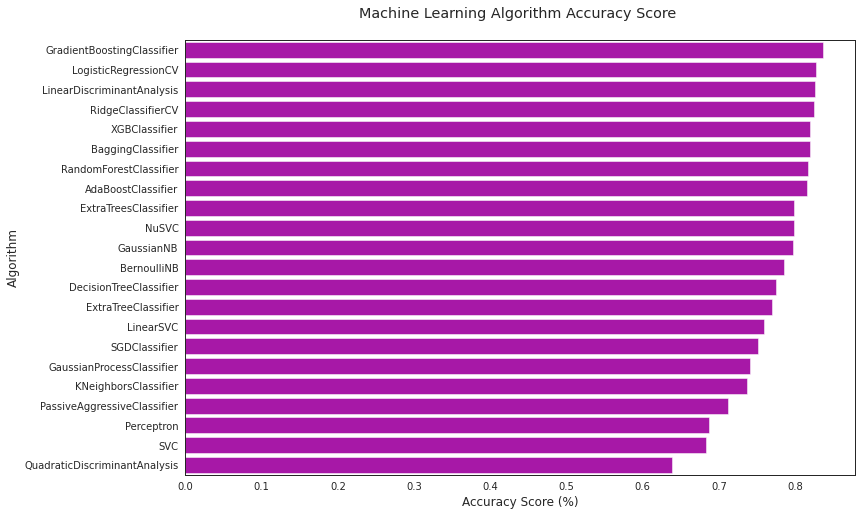

In [141]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')